# **Latar Belakang**


Sebagai penyedia layanan Jasa transportasi Bus Rapid Transit (BRT) di indonesia, Pemerintah provinsi DKI Jakarta menginginkan masukan dari Data analyst untuk meningkatkan performa pelayanan yang lebih baik.
Menurut Data yang disediakan di BPS, terjadi peningkatan jumlah penumpang dari Tahun 2023-2024 sebesar 6,83% dibandingkan tahun sebelumnya. 
Peningkatan jumlah penumpang ini diiringi oleh perkembangan jumlah bus yang melayani yakni sebanyak 4.400 unit bus pada Januari 2024. Sementara itu, pada Januari 2023, jumlah bus yang melayani penumpang baru mencapai 3.850 unit. [_berita terkait_](https://www.antaranews.com/berita/3992097/jumlah-penumpang-transjakarta-januari-2024-capai-30-juta)

## Pernyataan Masalah

Pemerintah DKI Jakarta ingin mendapatkan solusi dari data yg diamati seperti :
- Mengurangi durasi perjalanan yg lama dari 1 ke koridor tujuan tertentu,
- Jumlah kartu yang digunakan pengguna berdasarkan rentang umur dan perilaku perjalanan, 
- Efisiensi penggunaan rute (waktu tempuh),
- Ketersediaan jumlah Bis di Rute Tersibuk,
- Total pendapatan per rute,
- Prediksi jam-jam tersibuk setiap hari.

Sehingga dengan analisa yg tepat, Transjakarta sebagai penyedia bisnis jasa dapat berkembang menjadi lebih baik dan meningkatkan pelayanan nya

# **Tentang Dataset Transjakarta**

Dataset terdiri dari 22 kolom, dataset berdasarkan data perjalanan bulan april 2023 dimana ada 1 unik ID dan kolom-kolom lain untuk dianalisa

Berikut daftar isi Dataset yang sudah di siapkan
1.	transID: ID transaksi unik untuk setiap transaksi
2.	payCardID: Pengidentifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3.	payCardBank: Nama bank penerbit kartu pelanggan
4.	payCardName: Nama pelanggan yang disematkan di kartu.
5.	payCardSex: Jenis kelamin pelanggan
6.	payCardBirthDate: Tahun lahir pelanggan
7.	corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8.	corridorName: Nama Koridor / Nama Rute berisi Awal dan Akhir untuk setiap rute.
9.	direction: 0 untuk Pergi, 1 untuk Kembali. Arah rute.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: ID Perhentian Tap In (pintu masuk) untuk mengidentifikasi nama perhentian
12.	tapInStopsLat: Latitude perhentian tap in
13.	tapInStopsLon: Longitude perhentian tap in
14.	stopStartSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15.	tapInTime: Waktu tap in. Tanggal dan waktu
16.	tapOutStops: ID pemberhentian Tap Out (Keluar) untuk mengidentifikasi nama pemberhentian
17.	tapOutStopsName: Nama pemberhentian Tap out (keluar) tempat pelanggan melakukan tap out.
18.	tapOutStopsLat: Latitude perhentian tap out
19.	tapOutStopsLon: Longitude perhentian tap out
20.	stopEndSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21.	tapOutTime: Waktu tap out. Tanggal dan waktu
22.	payAmount: Jumlah yang dibayarkan pelanggan. Sebagian gratis. Sebagian tidak.


# **Pengolahan Data Awal**

import libarary yg akan kita gunakan


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Transjakarta.csv berbentuk csv, kita akan import untuk kita olah selanjutnya

In [3]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## Data Understanding & Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil.

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (37900, 22)


In [6]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


### Missing Value


Bisa dilihat dari describe diatas :

Jumlah data (count):

Kolom *payCardID*, *payCardBirthDate, direction, *tapInStopsLat*, tapInStopsLon, dan stopStartSeq* memiliki 37.900 data, yang berarti data ini lengkap.
Kolom *tapOutStopsLat, tapOutStopsLon, dan stopEndSeq* memiliki 36.556 data, menunjukkan adanya missing values (data hilang) di kolom-kolom ini.
Kolom *payAmount* memiliki 36.893 data, yang juga menunjukkan adanya missing values di kolom ini.

Distribusi Missing Data:

Missing data yang ada di kolom *tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan payAmount* mengindikasikan bahwa beberapa transaksi mungkin hanya berisi informasi tap-in (awal perjalanan) tanpa tap-out (akhir perjalanan). Hal ini bisa menggambarkan pola perjalanan tertentu, seperti penumpang yang hanya menggunakan layanan satu arah atau keluar di stasiun tanpa tapping out.

Korelasi antara Kolom:

Jika kolom *tapOutStopsLat, tapOutStopsLon, dan stopEndSeq* saling berhubungan (misalnya mewakili data tap-out), maka kemungkinan missing data pada kolom-kolom ini terjadi secara bersamaan.

Interpretasi Awal:

Kolom *payAmount* memiliki missing values lebih sedikit dibandingkan kolom tap-out, yang bisa berarti sebagian besar perjalanan tanpa tap-out masih memerlukan pembayaran

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

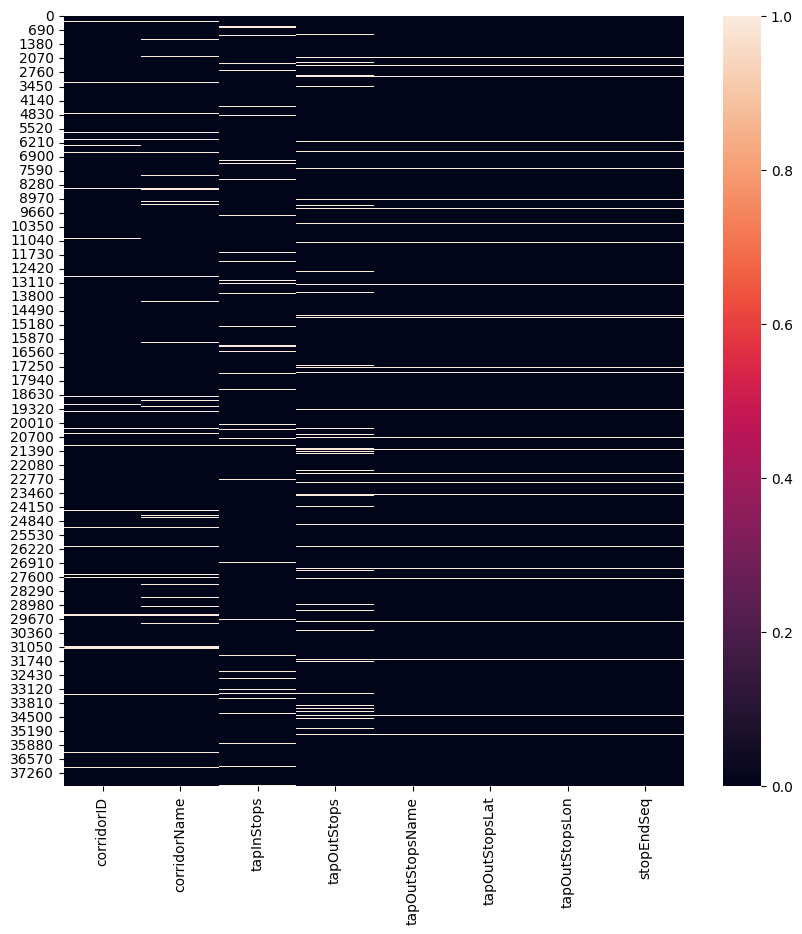

In [8]:
# Cek Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq']].isna())

Dapat dilihat persebaran missing value hanya kecil (kurang dari 10%) & berada di kolom yang bukan kriteria critical untuk kita gunakan dalam analisis _(kecuali kolom 'tapOutTime')_ yakni kolom _corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq'

Sebagai bahan analisa kita coba tampilkan persentasi 'tapOutTime' kolom berdasarkan pengguna yg tap in di koridor awal

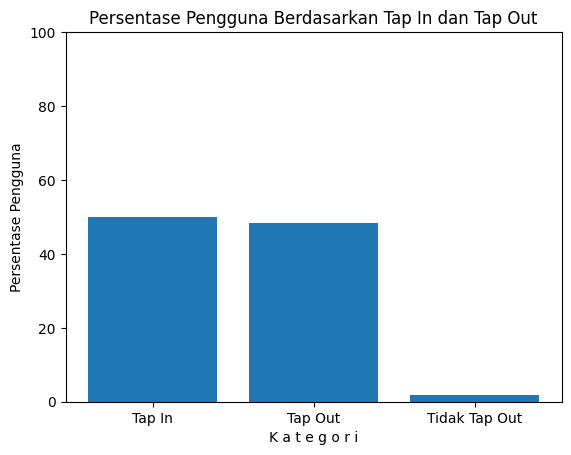

In [9]:
total_tap_in = df['tapInTime'].notnull().sum()
total_tap_out = df['tapOutTime'].notnull().sum()
total_not_tap_out = total_tap_in - total_tap_out

# Buat data untuk plot
data = {'Kategori': ['Tap In', 'Tap Out', 'Tidak Tap Out'],
        'Jumlah': [total_tap_in, total_tap_out, total_not_tap_out]}
df_plot = pd.DataFrame(data)
df_plot['Persentase'] = (df_plot['Jumlah'] / df_plot['Jumlah'].sum()) * 100

# Buat bar chart
plt.bar(df_plot['Kategori'], df_plot['Persentase'])
plt.xlabel('K a t e g o r i')
plt.ylabel('Persentase Pengguna')
plt.title('Persentase Pengguna Berdasarkan Tap In dan Tap Out')
plt.ylim(0, 100) 
plt.show()

In [10]:
df['tapOut_flag'] = df['tapOutTime'].notnull()

# Kelompokkan data berdasarkan tapInTime dan hitung persentase yang tidak tapOut
result = df.groupby('tapInTime').agg({'tapOut_flag': ['mean', 'count']})
result.columns = ['persentase_tapOut', 'total_tapIn']
result['persentase_tidak_tapOut'] = 1 - result['persentase_tapOut']

print(result)

                     persentase_tapOut  total_tapIn  persentase_tidak_tapOut
tapInTime                                                                   
2023-04-01 06:22:27                1.0            1                      0.0
2023-04-01 06:54:35                1.0            1                      0.0
2023-04-01 07:32:50                1.0            1                      0.0
2023-04-01 09:41:03                1.0            1                      0.0
2023-04-01 10:33:57                1.0            1                      0.0
...                                ...          ...                      ...
2023-04-30 21:43:18                1.0            1                      0.0
2023-04-30 21:46:00                1.0            1                      0.0
2023-04-30 21:48:15                1.0            1                      0.0
2023-04-30 21:51:08                1.0            1                      0.0
2023-04-30 21:55:41                1.0            1                      0.0

Hitung persentase pengguna yang tidak melakukan tapOut

In [11]:
total_tidak_tapOut = len(df[df['tapOut_flag'] == False])
total_pengguna = len(df)
persentase_tidak_tapOut = (total_tidak_tapOut / total_pengguna) * 100

print(f"Total persentase pengguna yang tidak melakukan tapOut: {persentase_tidak_tapOut:.2f}%")

Total persentase pengguna yang tidak melakukan tapOut: 3.55%


*Kembali ke Missing Value*
Ada 2 cara untuk menangani *missing value* dalam dataset ini:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup rendah
* kedua, kita isi dengan nilai 0 (null) untuk kolom yg akan kita gunakan di analisi yakni kolom _payAmount_

In [12]:
# Menghapus baris dengan missing value di kolom yang ditentukan
df = df.dropna(subset=[
    'corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 
    'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 
    'stopEndSeq', 'tapOutTime'
])

# Mengisi missing values dengan 0 pada kolom 'payAmount'
df['payAmount'] = df['payAmount'].fillna(0)

In [13]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapOut_flag         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32595 non-null  object 
 1   payCardID         32595 non-null  int64  
 2   payCardBank       32595 non-null  object 
 3   payCardName       32595 non-null  object 
 4   payCardSex        32595 non-null  object 
 5   payCardBirthDate  32595 non-null  int64  
 6   corridorID        32595 non-null  object 
 7   corridorName      32595 non-null  object 
 8   direction         32595 non-null  float64
 9   tapInStops        32595 non-null  object 
 10  tapInStopsName    32595 non-null  object 
 11  tapInStopsLat     32595 non-null  float64
 12  tapInStopsLon     32595 non-null  float64
 13  stopStartSeq      32595 non-null  int64  
 14  tapInTime         32595 non-null  object 
 15  tapOutStops       32595 non-null  object 
 16  tapOutStopsName   32595 non-null  object 
 17

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [15]:
listItem = []
for col in df.columns:
    unique_values = df[col].unique()
    sample_size = min(2, len(unique_values))
    unique_sample = list(np.random.choice(unique_values, size=sample_size, replace=False))

    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), unique_sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df.shape)
print(dfDesc)

(32595, 23)
        dataFeatures dataType  null  unique  \
0            transID   object     0   32595   
1          payCardID    int64     0    1959   
2        payCardBank   object     0       6   
3        payCardName   object     0    1952   
4         payCardSex   object     0       2   
5   payCardBirthDate    int64     0      66   
6         corridorID   object     0     221   
7       corridorName   object     0     216   
8          direction  float64     0       2   
9         tapInStops   object     0    2454   
10    tapInStopsName   object     0    2453   
11     tapInStopsLat  float64     0    2439   
12     tapInStopsLon  float64     0    2323   
13      stopStartSeq    int64     0      66   
14         tapInTime   object     0   32000   
15       tapOutStops   object     0    2158   
16   tapOutStopsName   object     0    2157   
17    tapOutStopsLat  float64     0    2147   
18    tapOutStopsLon  float64     0    2056   
19        stopEndSeq  float64     0      74   
2

Sebelum dibersihkan, kita memiliki 37,901 baris data, sekarang kita memiliki 32,595 baris data dan penambahan 1 kolom _tapOut_flag_


Sekitar 13% baris data yang kosong dihapus, dan sisa data kosong dalam payAmount diisi dengan nilai 0. Data ini sudah cukup untuk keperluan analisa kita dalam Solusi Pernyataan Masalah yang kita jabarkan di awal.

# **Analisa Data**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis data diantaranya :
- Durasi Perjalanan rata-rata tiap koridor
- Penggunaan Rute & Jam tersibuk serta total pemasukan terbanyak
- Kepercayaan konsumen terhadap layanan jasa
- Persentasi Bank kartu pengguna
- Menganalisa Trip (perjalan) terbanyak tiap-tiap koridor

## Durasi Perjalanan

Konversi kolom waktu tap in dan tap out ke datetime (karena tipe data masih object)

In [16]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32595 non-null  object        
 1   payCardID         32595 non-null  int64         
 2   payCardBank       32595 non-null  object        
 3   payCardName       32595 non-null  object        
 4   payCardSex        32595 non-null  object        
 5   payCardBirthDate  32595 non-null  int64         
 6   corridorID        32595 non-null  object        
 7   corridorName      32595 non-null  object        
 8   direction         32595 non-null  float64       
 9   tapInStops        32595 non-null  object        
 10  tapInStopsName    32595 non-null  object        
 11  tapInStopsLat     32595 non-null  float64       
 12  tapInStopsLon     32595 non-null  float64       
 13  stopStartSeq      32595 non-null  int64         
 14  tapInTime         32595 non

Hitung durasi perjalanan dalam menit

In [18]:
df['travel_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

Hitung Rata-rata durasi perjalanan

In [19]:
avg_duration = df['travel_duration'].mean()
print(f'Rata-rata durasi perjalanan: {avg_duration:.2f} menit')


Rata-rata durasi perjalanan: 72.23 menit


Mengurutkan berdasarkan waktu tempuh tertinggi

In [20]:
avg_travel_time_per_route = df.groupby('corridorName')['travel_duration'].mean().reset_index()

In [21]:
avg_travel_time_per_route = avg_travel_time_per_route.sort_values(by='travel_duration', ascending=False)
print(avg_travel_time_per_route)

                              corridorName  travel_duration
67               Kampung Rambutan - Blok M        83.659375
32                       Cinere - Kuningan        82.890889
177              Stasiun Palmerah - Tosari        81.617258
156   Rusun Pinus Elok - Rusun Pulo Gebang        81.610333
171  Senen - Pulo Gadung via Kelapa Gading        80.222797
..                                     ...              ...
118           Pulo Gadung 2 - Dukuh Atas 2        63.432823
173           St. LRT Pegangsaan Dua - JIS        62.938492
174             Stasiun Manggarai - Blok M        62.834694
112                    Pondok Kelapa - BKN        62.009091
122            Pulo Gebang - Pulo Gadung 2        60.738162

[216 rows x 2 columns]


## Analisa Penggunaan Rute

Untuk meihat rute yang paling sering digunakan

In [22]:
# Menghitung jumlah tap in per rute (corridorName)
route_usage = df['corridorName'].value_counts()

print(route_usage)

corridorName
Cibubur - Balai Kota                              362
Ciputat - CSW                                     350
Harmoni - Jakarta International Stadium           313
Pulo Gadung - Monas                               311
Kampung Rambutan - Pondok Gede                    305
                                                 ... 
Grogol - Pos Pengumben via Slipi                   37
Senen - Tanah Abang                                36
Term. Pulo Gadung - Lampiri                        28
Tanah Abang - Kebayoran Lama via Pos Pengumben     21
Kampung Rambutan - Blok M                          16
Name: count, Length: 216, dtype: int64


### Pendapatan Total per Rute

Menghitung pendapatan per rute

In [23]:
revenue_per_route = df.groupby('corridorName')['payAmount'].sum().reset_index()
print(revenue_per_route)

                                   corridorName  payAmount
0        Andara - Stasiun Universitas Pancasila        0.0
1                                  BKN - Blok M        0.0
2                                BSD - Jelambar   385000.0
3                       BSD Serpong - Fatmawati  1700000.0
4                             Batusari - Grogol   770000.0
..                                          ...        ...
211        Terminal Rawamangun - Cipinang Muara        0.0
212          Terminal Tanah Merah - Pulo Gadung        0.0
213        Terminal Tanjung Priok - Ancol Barat        0.0
214  Tongtek - Tebet Eco Park (TEP) - Cililitan        0.0
215         Universitas Indonesia - Lebak Bulus   577500.0

[216 rows x 2 columns]


Urutkan berdasarkan pendapatan tertinggi

In [24]:
revenue_per_route = revenue_per_route.sort_values(by='payAmount', ascending=False)
print(revenue_per_route)

                                   corridorName  payAmount
21                         Cibubur - Balai Kota  7240000.0
6                       Bekasi Barat - Kuningan  4020000.0
95                Palem Semi - Bundaran Senayan  3240000.0
31                    Cinere - Bundaran Senayan  3220000.0
23                    Cibubur Junction - Blok M  2920000.0
..                                          ...        ...
209        Terminal Kampung Melayu - Kapin Raya        0.0
211        Terminal Rawamangun - Cipinang Muara        0.0
212          Terminal Tanah Merah - Pulo Gadung        0.0
213        Terminal Tanjung Priok - Ancol Barat        0.0
214  Tongtek - Tebet Eco Park (TEP) - Cililitan        0.0

[216 rows x 2 columns]


##  Distribusi Pengguna Berdasarkan Usia

Menambahkan kolom usia

In [25]:
df['age'] = 2024 - df['payCardBirthDate']  # 2024 sebagai tahun saat ini

Membuat histogram untuk melihat distribusi usia

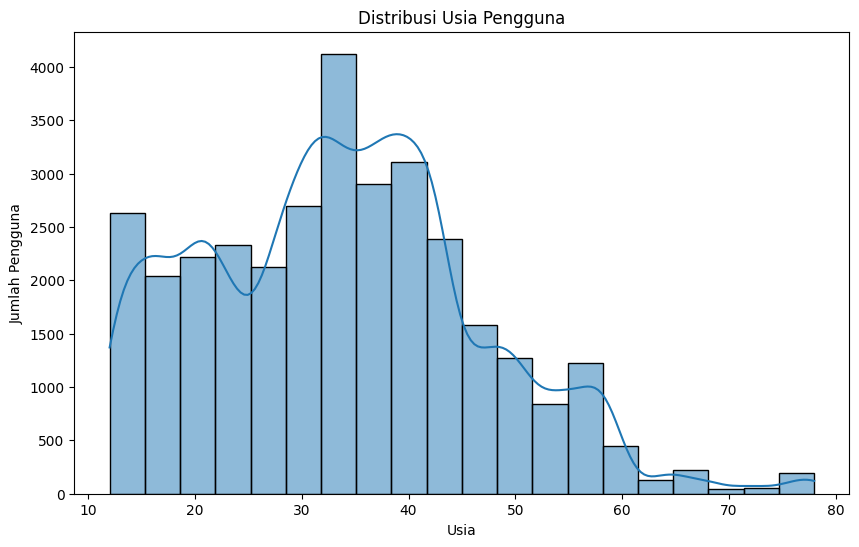

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()

## Penggunaan Berdasarkan Waktu (24 jam)

Menambahkan kolom jam

In [27]:
df['tapInHour'] = df['tapInTime'].dt.hour

Membuat plot jumlah tap in berdasarkan jam

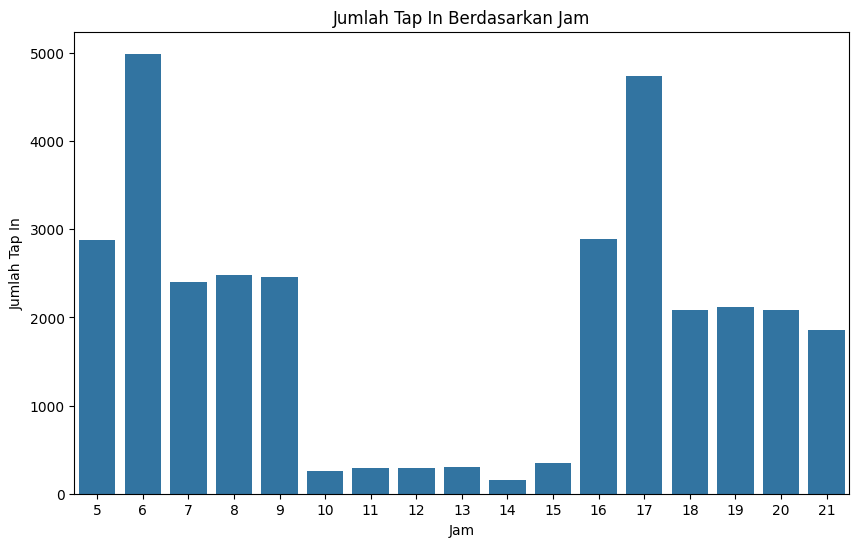

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tapInHour', data=df)
plt.title('Jumlah Tap In Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Tap In')
plt.show()

## Distribusi Pemakaian kartu 

Kita ingin mengetahui segmentasi pemakaian kartu dalam transaksi untuk mendapatkan insight pada 4 kolom yg berisi value pengguna kartu

_payCardName, payCardBirthDate, payCardBank', payCardSex_

In [29]:
pengguna = df[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]
pengguna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 37899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       32595 non-null  object
 1   payCardBirthDate  32595 non-null  int64 
 2   payCardBank       32595 non-null  object
 3   payCardSex        32595 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


drop duplikasi nama

In [30]:
pengguna = pengguna.drop_duplicates(subset='payCardName', keep='first', ignore_index=True)
pengguna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       1952 non-null   object
 1   payCardBirthDate  1952 non-null   int64 
 2   payCardBank       1952 non-null   object
 3   payCardSex        1952 non-null   object
dtypes: int64(1), object(3)
memory usage: 61.1+ KB


In [31]:
pengguna.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,Bajragin Usada,2008,emoney,M
1,Gandi Widodo,1997,dki,F
2,Emong Wastuti,1992,dki,F
3,Surya Wacana,1978,flazz,F
4,Embuh Mardhiyah,1982,flazz,M


In [32]:
metode_bayar = pengguna.payCardBank.value_counts().reset_index(name='count')
metode_bayar

,payCardBank,count
0,dki,958
1,emoney,366
2,flazz,168
3,brizzi,162
4,bni,150
5,online,148


Visualisasi Pemakaian Kartu

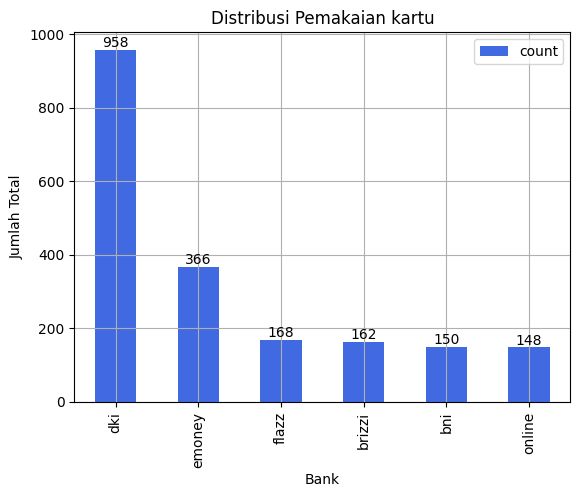

In [33]:
ax = metode_bayar.plot(x='payCardBank', kind='bar', color='royalblue')
for i, v in enumerate(metode_bayar['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Bank')
plt.ylabel('Jumlah Total')
plt.title('Distribusi Pemakaian kartu')
plt.show()

Buat Bar Chart

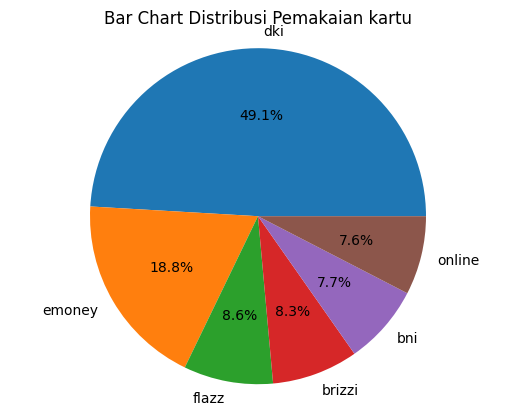

In [34]:
plt.pie(metode_bayar['count'], labels=metode_bayar['payCardBank'], autopct='%1.1f%%')
plt.axis('equal')  # Untuk memastikan pie chart menjadi lingkaran
plt.title('Bar Chart Distribusi Pemakaian kartu')
plt.show()

Sebanyak 49% dari total pengguna menggunakan kartu uang elektronik terbitan Bank DKI (JakCard) kemudian disusul E-Money dari Bank Mandiri dan Brizzi dari bank BRI

https://jakarta.bisnis.com/read/20230729/77/1679444/bank-dki-sebut-jumlah-transaksi-jakcard-tumbuh-10486-persen-hingga-semester-i-2023

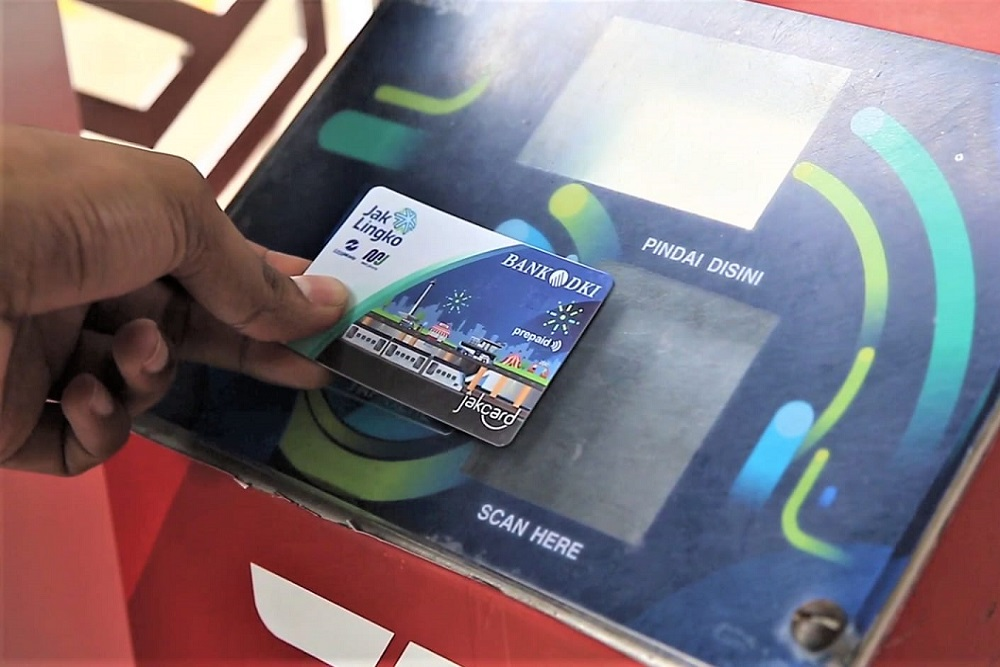

## Analisa Gender

Membuat pie chart untuk distribusi gender

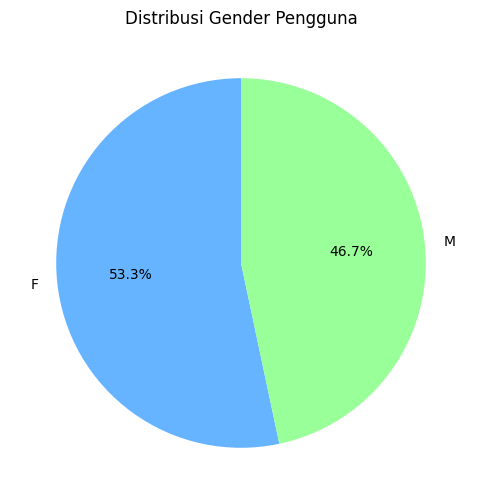

In [35]:
gender_distribution = df['payCardSex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribusi Gender Pengguna')
plt.show()

## Analisa Traffic

Gunakan kolom tertentu untuk membuat kolom baru yg berisi data yg akan kita pakai 
buat 4 kolom baru.

In [36]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['tapOutHour'] = df['tapOutHour'].replace(0, 24)
df['tripDuration'] = df['tapOutHour'] - df['tapInHour']
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapOut_flag,travel_duration,age,tapInHour,tapOutHour,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,True,39.150000,16,5,6,1
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,True,57.283333,27,5,6,1
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,True,51.816667,32,5,6,1
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,True,43.416667,46,5,6,1
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,True,39.466667,42,6,6,0


In [37]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapOut_flag', 'travel_duration', 'age', 'tapInHour',
       'tapOutHour', 'tripDuration'],
      dtype='object')

In [38]:
df['tripDuration'].describe()

count    32595.000000
mean         1.204817
std          0.620631
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: tripDuration, dtype: float64

Dapat dilihat, Rata-rata (mean) durasi perjalanan sebesar 1.2 jam atau 1 jam 12 menit dengan durasi tersingkat kurang dari 1 jam dan perjalanan terlama yaitu 3 jam.

Coba kita cari rute mana saja

In [39]:
#Sortir berdasarkan durasi perjalanan
df.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='tripDuration', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,BSI Cengkareng,Taman Palem Lestari,3,1
1,RSIA Duren Tiga 1,PLN Duren Tiga 1,3,1
2,Ps. Bintang Mas 1,Simpang Budi Sakti Raya,3,1
3,Ampera 1,Syibi,3,1
4,Gama Tower,Patra Kuningan 1,3,1
...,...,...,...,...
6803,Sbr. Perum Qoriyah Toyibah,Jln. Sitrun,0,5
6804,Sbr. Ps. Bukit Duri,Tongtek,0,1
6805,Sbr. Ps. Lokbin Muria,Waduk Setiabudi Jln. Gembira,0,4
6806,Sbr. Ps. Klender,Pool Mayasari Bakti,0,1


In [40]:
#Sortir berdasarkan rute terbanyak
df.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Rusun Kapuk Muara,Penjaringan,1,69
1,Penjaringan,Rusun Kapuk Muara,1,64
2,Garuda Taman Mini,BKN,1,52
3,Tanah Merdeka Arah Timur,Kampung Rambutan,1,44
4,Garuda Taman Mini,Pinang Ranti,1,44
...,...,...,...,...
6803,Yaspen Islam Al Mamur Ciganjur,Sbr. Masjid Jami Asy Syakirin,2,1
6804,YPI Asyaadah,Sentra Timur,0,1
6805,Duren Tiga,Mampang 5,2,1
6806,Wisma Subud,Simpang Pinang I Pondok Labu,1,1


Bisa dilihat jumlah perjalan terbanyak adalah dari halte Kapuk Muara ke Penjaringan, ini merupakan rute populer, mengingat banyak rute bis lain (corridorID) yg berhenti di Area ini seperti 9, 9A, 1A, 12, 12A dimana Halte Penjaringan adalah penghubung antar Daerah lain dari Jakarta Utara.

# **Kesimpulan Dan Rekomendasi**

Kesimpulan dari rangkaian analisa bisa kita buktikan bahwa :
    
* Rata-rata durasi perjalanan: 72 menit, dimana durasi tertinggi adalah 83 menit yakni koridor Kampung Rambutan - Blok M (coridor 7B) 
    dimana jarak antar halte adalah 17KM , Busway 7B   merupakan bus reguler       non-BRT yang beroperasi setiap hari dari pukul 05.00–21.30 WIB. Rute ini menghubungkan jalan-jalan strategis di Jakarta Timur dan Jakarta Selatan. Bus ini cukup ramai penumpang saat jam berangkat dan pulang kerja karena menjangkau area perkantoran dan kawasan strategis di Mampang dan Blok M, 
    * Rekomendasi : Mungkin pemprov bisa melakukan Efisiensi penggunaan Rute dengan memperbaiki struktur di Area yg dilewati Transjakarta, seperti pelebaran jalan, penambahan armada jaga, mengingat banyak juga kendaraan lain masuk jalur busway sehingga menyebabkan macet, karena dibandingkan dengan kendaraan pribadi hanya memerlukan waktu tempuh 40 menit.

* Koridor yg paling sering digunakan : Cibubur - Balai Kota, _Koridor 1T_ (362 tap in) serta juga rute dengan Pendapatan teringgi sebesar 78 Juta / bulan.
    Rute ini memiliki persebaran halte pemberhentian Jend Sudirman, Karet, Dukuh Atas, MH Thamrin. Ini merupakan Pusat Perkantoran.
    

* Jumlah perjalanan terbanyak : 
    Tidak menggambarkan hasil dari jumlah tap-in tertinggi maupun penyumbang profit tertinggi (rute Cibubur - Balai Kota), namun predikat perjalanan terbanyak (trip) berasal dari rute 
    Rusun Kapuk Muara – Penjaringan sebanyak 69 Trip
    * Fenomena ini merupakan anomaly dan perusahaan bisa di *lakukan investigasi lebih lanjut*, walaupun secara prediksi halte Kapuk Muara ke Penjaringan ini merupakan rute populer, mengingat banyak rute bis lain (corridorID) yg berhenti di Area ini seperti 9, 9A, 1A, 12, 12A dimana Halte Penjaringan adalah penghubung antar Daerah lain dari Jakarta Utara.

   
* Total persentase pengguna yang tidak melakukan tapOut: 3.55%, 
Data ini mengindikasikan bahwa peraturan yang sudah dibuat mengenai sistem transaksi Tap in dan Tap out belum sepenuhnya terealisasi dengan baik. 
    (_baca_ https://megapolitan.kompas.com/read/2022/10/04/19011811/naik-turun-bus-transjakarta-wajib-tap-in-tap-out-agar-kartu-tak-terblokir)
    *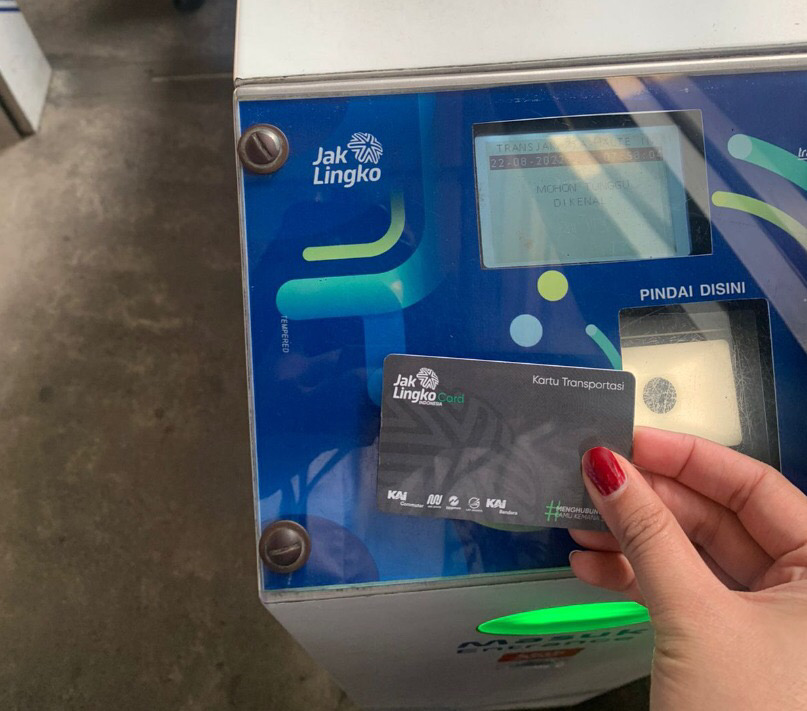*


* Distirbusi penggunaan kartu pembayaran (BankCard) : 
    Sebanyak 49% dari total pengguna menggunakan kartu uang elektronik terbitan Bank DKI (JakCard) kemudian disusul E-Money dari Bank Mandiri dan Brizzi dari bank BRI
    * Total profit dari bank DKI sebanyak : 448 Juta rupiah,
    Dari total semua pemasukan di bulan April 2023 sebanyak 990 Juta rupiah yg berarti hampir separuh pengguna jasa menggunakan JakCard / Kartu Bank DKI yg lain
    * Keuntungan terbanyak dari penggunaan kartu di inisiasi oleh kartu terbitan bank DKI, dalam hal ini JakCard (jakarta one stop Card), 
    Bank BNI adalah penyumbang terkecil dari keuntungan dibawah pengguna online, mungkin ini bisa menjadi gambaran untuk Stakeholder BNI untuk menaikan promo maupun strategi pemasaran lain yg efektif.

* Revenue (Profit) tertinggi terjadi di tanggal 17,18,19 April 2023.. 
    * 19 April cuti bersama lebaran, 17,18 terjadi pelonjakan masyarakat yg disinyalir dengan persiapan mudik.

* Distribusi Rentang umur pengguna terbanyak adalah Dewasa dan Remaja masing berjumlah 17rb & 11rb pengguna.

* Pengguna Transjakarta keseluruhan di dominasi oleh Wanita sebanyak 53% dimana bisa kita lihat kepercayaan konsumen sudah bisa dibilang baik,
  dengan mempertimbangkan aspek keselamatan, kenyamanan & keamanan layanan jasa. 

* Jam tersibuk setiap hari nya : Jam 5-9 pagi & Jam 4-9 malam, dari data ini kita bisa menyimpulkan bahwa 4 jam di pagi hari merupakan aktivitas pengguna untuk pergi ke kantor dan sekolah serta 5 jam sore hingga malam adalah aktivitas pulang ke rumah, disarankan menambah armada untuk mencegah penumpukan di setiap koridor. 

Remkomendasi Keseluruhan :

Dengan analisa deskriptif dari data yang di dapatkan, kita dapat merekomendasikan kepada Pemprov dan Stakeholder ketiga untuk meningkatkan layanan ditambah dengan membangun kolaborasi dengan pemerintah dan swasta untuk membangun lebih banyak Halte yg lebih efisien untuk mendorong pertumbuhan masyarakat dan juga pertumbuhan bisnis.

Jika memungkinkan, tambah lagi armada penjaga pintu jalur Busway untuk memberikan layanan maksimal dan lebih mendapatkan kepercayaan dari masyarakat untuk beralih ke Transportasi umum, mengingat pada tahun 2030 pemerintah menetapkan target pengguna jasa Transjakarta sebanyak 30% , (baca: [text](https://megapolitan.kompas.com/read/2024/07/04/20533571/pengguna-transportasi-publik-di-jakarta-hanya-1886-persen#google_vignette))
* Meskipun jumlah pengguna Transjakarta di Januari 2024 hanya 18% dibandingkan kendaraan Transportasi lain nya. Ini Merupakan langkah yg masuk akal mengingat persentase penumpang Naik 54% Di Januari 2024 dibandingkan pada januari 2023
(baca: [text](https://quarta.id/nasional/jumlah-pengguna-transjakarta-melonjak-januari-2024-capai-309-juta-naik-54-dibanding-januari-2023/))

Pemerintah harus Menaggapi cepat anomali yang terjadi pada penyebaran rute dengan koridor tersibuk diatas, dengan melakukan inspeksi nyata langsung dijalan dapat memberikan gambaran lebih atas anomali ini disamping juga mempertimbangkan faktor-faktor external seperti kemacetan, banjir, perubahan rute karean pengalihan arus dll.

Transjakarta bersama PemProv DKI Jakarta harus tetap bersinergi dengan Stakeholder ketiga untuk penyebaran metode pembayaran untuk perkembangan bisnis perusahaan, sangat disarankan meninjau metode pembayaran Online (Non-Card) demi mewujudkan tujuan Neraca perusahaan (Profit).